In [1]:
import numpy as np
import pyvista as pv

import matplotlib.pyplot as plt

In [2]:
## Read the file
#mesh0 = pv.read('../jialin_wu_data/2d_canyon_0.vtu')
mesh0 = pv.read('../WaveSuite_VTK/sateNo4_1_40.vtu')  #from 40 to 99

# Understand which data is inside the file

Apparently there are 3 kinds of data inside the file
- Point_data
- Cell_data
- Field_data

In [3]:
mesh0.point_data

pyvista DataSetAttributes
Association     : POINT
Active Scalars  : None
Active Vectors  : None
Active Texture  : None
Active Normals  : None
Contains arrays :
    nut                     float32    (851101,)
    p_rgh                   float32    (851101,)
    p                       float32    (851101,)
    alpha.water             float32    (851101,)
    U                       float32    (851101, 3)

The cells have information too but from I understood we will ignore this information for now

In [4]:
print(mesh0.cell_data)

#print('\n ANyway, I am still leaving some cell commands here: \n ')
#print('The cells numbering?: \n ',mesh0.cells , '\n')
#print('What is this?: \n ',mesh0.celltypes , '\n')

pyvista DataSetAttributes
Association     : CELL
Active Scalars  : None
Active Vectors  : None
Active Texture  : None
Active Normals  : None
Contains arrays :
    cellID                  int32      (1008231,)
    nut                     float32    (1008231,)
    p_rgh                   float32    (1008231,)
    p                       float32    (1008231,)
    alpha.water             float32    (1008231,)
    U                       float32    (1008231, 3)


In [5]:
mesh0.field_data

pyvista DataSetAttributes
Association     : NONE
Contains arrays : None

I think that all the previous forms of data are called arrays. 
So, when arrays get mentioned, they refer to all forms of the previous data. 

However, we are only going to extract information from points.

# Look at the information available

In [6]:
#All information available
mesh0

UnstructuredGrid (0x29d58e28880)
  N Cells:	1008231
  N Points:	851101
  X Bounds:	2.980e+02, 3.820e+02
  Y Bounds:	-3.000e+01, 3.000e+01
  Z Bounds:	-5.006e+01, 6.000e+01
  N Arrays:	11

Ok, here I see that the mesh0 has:
    - 851101 points
    - 1008231 cells
    - 11 variables
    
I also notice that the there are 5 point features that have non-zero values but out of them I am only interested in 'U' and 'nut' which are Velocity and dynamic viscosity

# Plot one feature

In [7]:
#Look at the available node features
mesh0.array_names

['nut',
 'p_rgh',
 'p',
 'alpha.water',
 'U',
 'cellID',
 'nut',
 'p_rgh',
 'p',
 'alpha.water',
 'U']

Since the point and cell arrays have the same name, we will have to rename some of them

In [8]:
mesh0.rename_array(old_name='nut', new_name='nut_cell', preference='cell')
mesh0.rename_array(old_name='p_rgh', new_name='p_rgh_cell', preference='cell')
mesh0.rename_array(old_name='p', new_name='p_cell', preference='cell')
mesh0.rename_array(old_name='alpha.water', new_name='alpha.water_cell', preference='cell')
mesh0.rename_array(old_name='U', new_name='U_cell', preference='cell')

In [9]:
mesh0

UnstructuredGrid (0x29d58e28880)
  N Cells:	1008231
  N Points:	851101
  X Bounds:	2.980e+02, 3.820e+02
  Y Bounds:	-3.000e+01, 3.000e+01
  Z Bounds:	-5.006e+01, 6.000e+01
  N Arrays:	11

In [10]:
# Select which feature you want to plot
# In this case I am choosing 'Pressure'
feature_select = 'U_cell'
mesh0.set_active_scalars(feature_select)

In [11]:
#You can check that after choosing a certain variable it will appear in bold
mesh0

UnstructuredGrid (0x29d58e28880)
  N Cells:	1008231
  N Points:	851101
  X Bounds:	2.980e+02, 3.820e+02
  Y Bounds:	-3.000e+01, 3.000e+01
  Z Bounds:	-5.006e+01, 6.000e+01
  N Arrays:	11

C:\Users\amc121\AppData\Local\Programs\Python\Python310\lib\site-packages\pyvista\jupyter\notebook.py:60: UserWarning: Failed to use notebook backend: 

Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(


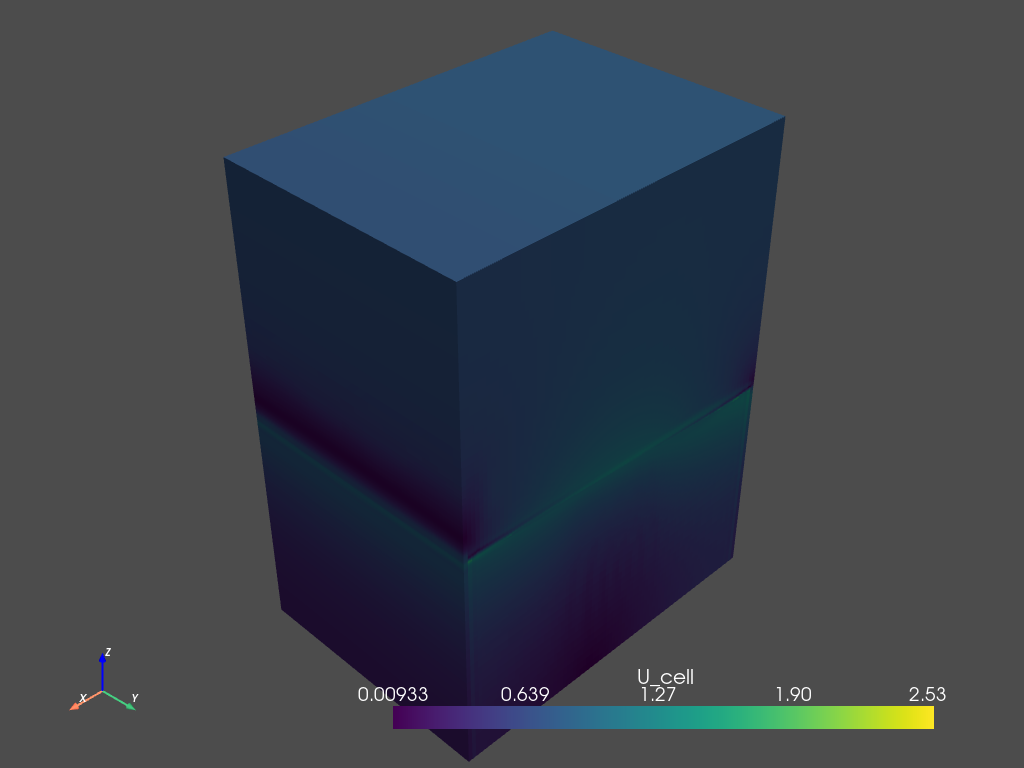

In [12]:
# Plot the selected feature
mesh0.plot()

In [13]:
#borrar
mesh0

UnstructuredGrid (0x29d58e28880)
  N Cells:	1008231
  N Points:	851101
  X Bounds:	2.980e+02, 3.820e+02
  Y Bounds:	-3.000e+01, 3.000e+01
  Z Bounds:	-5.006e+01, 6.000e+01
  N Arrays:	11

In [14]:
# Select which feature you want to plot
# In this case I am choosing 'Pressure'
feature_select = 'U'
mesh0.set_active_scalars(feature_select)

In [15]:
#borrar
mesh0

UnstructuredGrid (0x29d58e28880)
  N Cells:	1008231
  N Points:	851101
  X Bounds:	2.980e+02, 3.820e+02
  Y Bounds:	-3.000e+01, 3.000e+01
  Z Bounds:	-5.006e+01, 6.000e+01
  N Arrays:	11

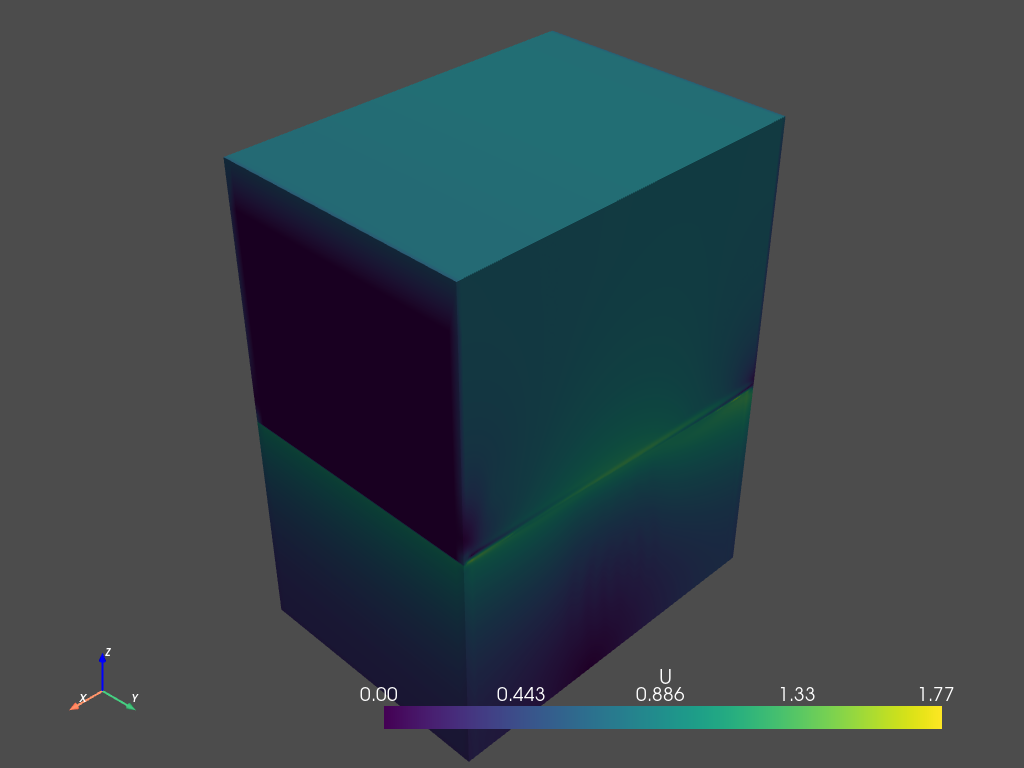

In [16]:
mesh0.plot()

In [17]:
#borrar
mesh0

UnstructuredGrid (0x29d58e28880)
  N Cells:	1008231
  N Points:	851101
  X Bounds:	2.980e+02, 3.820e+02
  Y Bounds:	-3.000e+01, 3.000e+01
  Z Bounds:	-5.006e+01, 6.000e+01
  N Arrays:	11

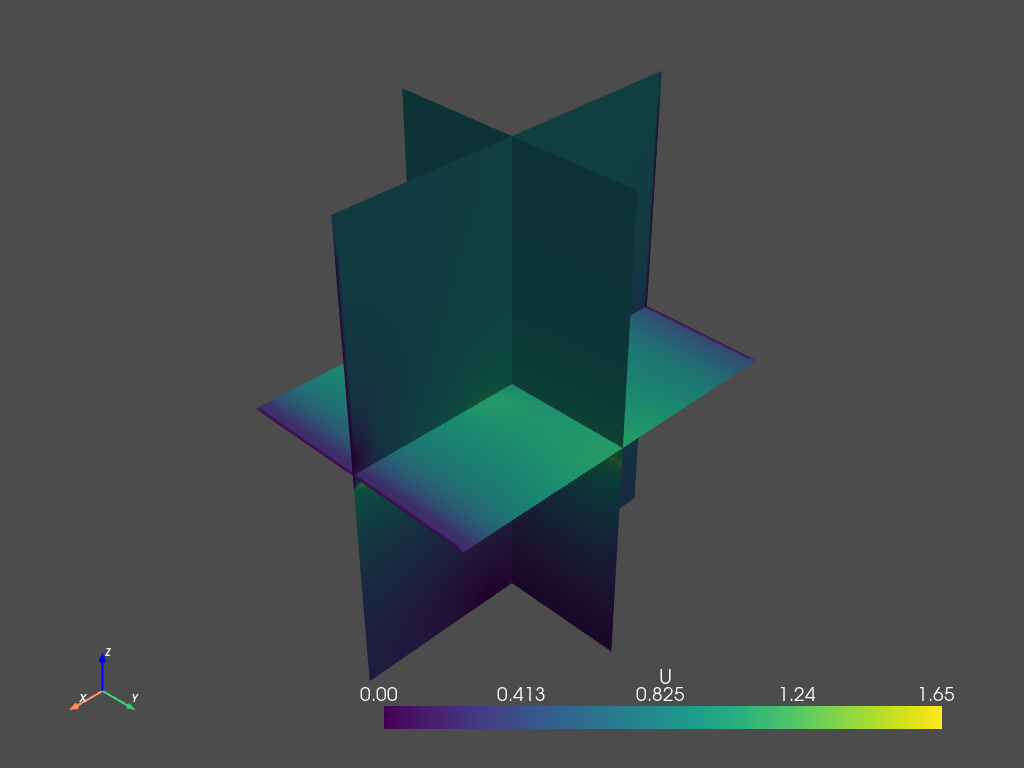

In [18]:
#Apparently you can take slices; however I do not know if this would be useful fr something apart from plotting
slice_ort = mesh0.slice_orthogonal()
slice_ort.plot()

##There are more (I think similar) methods but I have not used them
#slice
#slice_along_axis
#slice_along_line

In [19]:
feature_select = 'nut'
mesh0.set_active_scalars(feature_select)

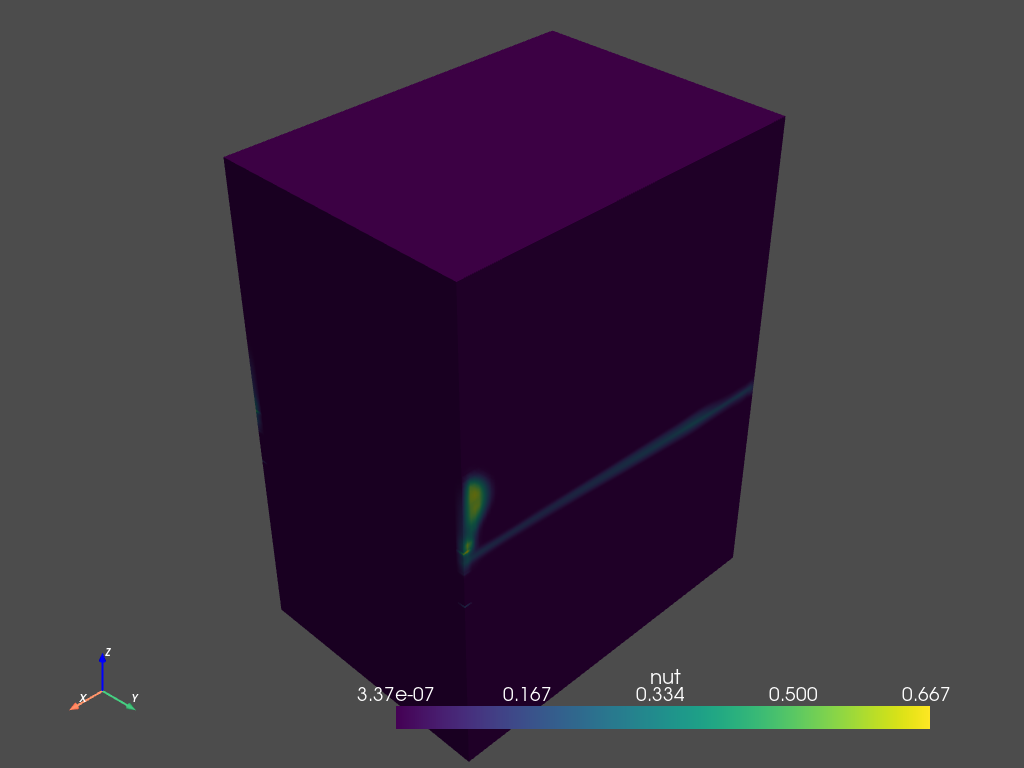

In [20]:
mesh0.plot()

In [21]:
# https://docs.pyvista.org/examples/02-plot/labels.html
mesh0['Node Numbering'] = [f"{i}" for i in range(mesh0.n_points)]

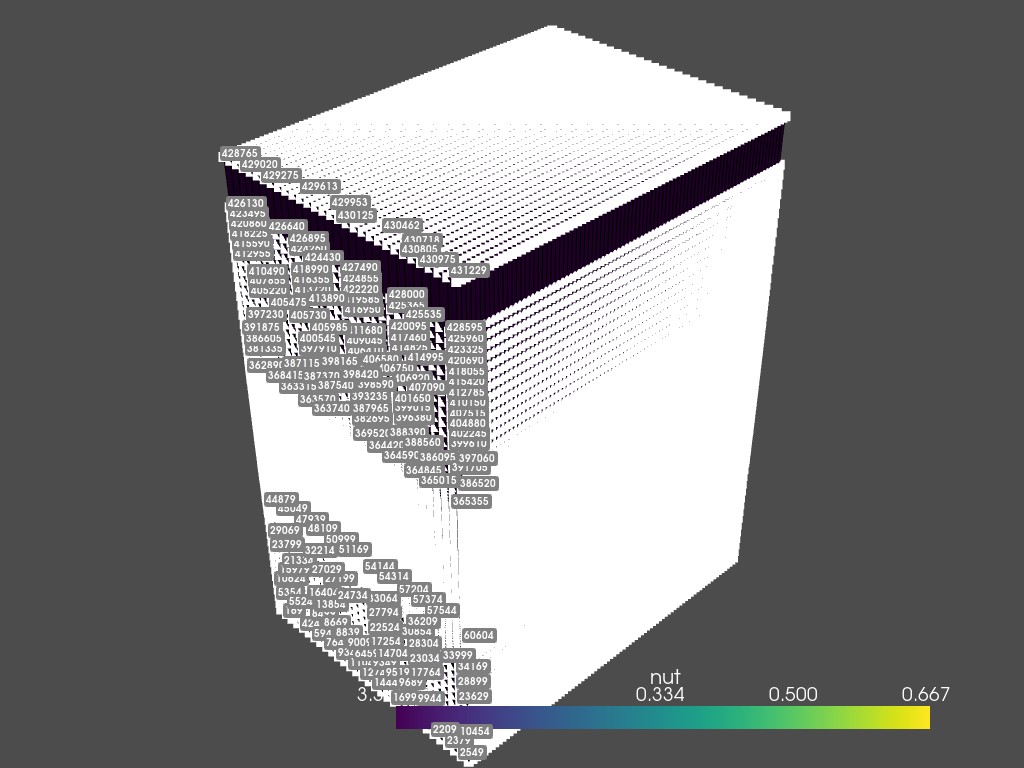

In [22]:
plotter = pv.Plotter()
plotter.add_mesh(mesh0, show_edges=True) #scalars="Spatial Point Data",
#plotter.add_mesh(mesh0, show_edges=True)
plotter.add_point_labels(mesh0, "Node Numbering", point_size=10, font_size=10)
plotter.show()

But wait, we want to peak a look at one slice of this plot, to get a better view of what is happening close to the buoy

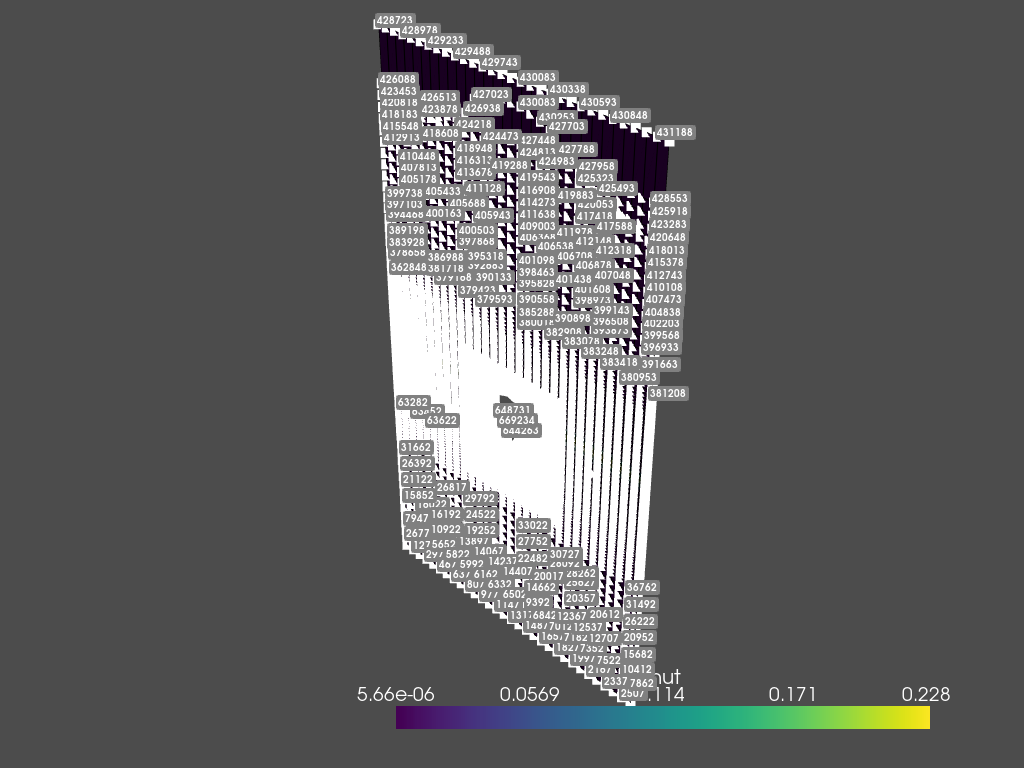

In [23]:
##Apparently you can take slices; however I do not know if this would be useful fr something apart from plotting
#slice_ort = mesh0.slice(normal='x')
#slice_ort.plot()

mesh0_x_slice = mesh0.slice(normal='x')

plotter = pv.Plotter()
plotter.add_mesh(mesh0_x_slice, show_edges=True) 
plotter.add_point_labels(mesh0_x_slice, "Node Numbering", point_size=10, font_size=10)
plotter.show()

In [24]:
mesh0_x_slice

PolyData (0x29d58f42f20)
  N Cells:	11502
  N Points:	11563
  X Bounds:	3.400e+02, 3.400e+02
  Y Bounds:	-3.000e+01, 3.000e+01
  Z Bounds:	-5.005e+01, 6.000e+01
  N Arrays:	12

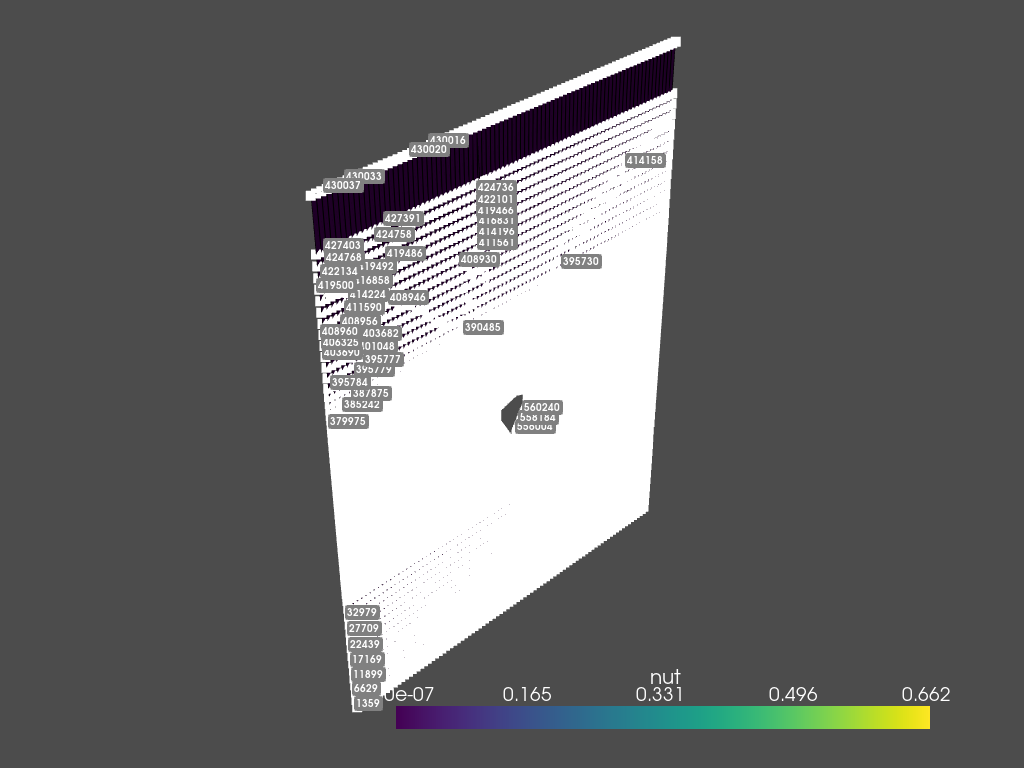

In [25]:
mesh0_y_slice = mesh0.slice(normal='y')

plotter = pv.Plotter()
plotter.add_mesh(mesh0_y_slice, show_edges=True) 
plotter.add_point_labels(mesh0_y_slice, "Node Numbering", point_size=10, font_size=10)
plotter.show()

In [26]:
mesh0_y_slice

PolyData (0x29d58f41cc0)
  N Cells:	21456
  N Points:	21300
  X Bounds:	2.980e+02, 3.820e+02
  Y Bounds:	-5.421e-20, 2.168e-19
  Z Bounds:	-5.006e+01, 6.000e+01
  N Arrays:	12

OK, why do I have new features that somehow were created when I did plot() and why do they end in "-normed" ?

# How to get node features matrix?? 

Number of points

In [27]:
print('The number of points: \n ', mesh0.n_points , '\n')
print('The number of points: \n ', len(mesh0.points))

The number of points: 
  851101 

The number of points: 
  851101


Points location

In [28]:
#In this link says that mesh.points gives you the location 
#https://docs.pyvista.org/api/core/_autosummary/pyvista.UnstructuredGrid.points.html
print('The points coordinates (or location) in 3D: \n ', mesh0.points , '\n')

The points coordinates (or location) in 3D: 
  [[ 2.98000e+02 -3.00000e+01 -5.00000e+01]
 [ 2.99000e+02 -3.00000e+01 -5.00000e+01]
 [ 3.00000e+02 -3.00000e+01 -5.00000e+01]
 ...
 [ 3.40773e+02 -1.25068e-01  3.15526e+00]
 [ 3.40768e+02 -1.24139e-01  3.13607e+00]
 [ 3.40764e+02 -1.23520e-01  3.12329e+00]] 



In [29]:
print('Again, the features names: \n ', mesh0.array_names)
print('\n and the number of features: ', mesh0.n_arrays)

point_names = ['nut','p_rgh','p','alpha.water','U']

print('\n But if I limit myself to point data then I have the features: ', point_names)
print('which are just', len(point_names))

Again, the features names: 
  ['nut', 'p_rgh', 'p', 'alpha.water', 'U', 'Node Numbering', 'cellID', 'nut_cell', 'p_rgh_cell', 'p_cell', 'alpha.water_cell', 'U_cell']

 and the number of features:  12

 But if I limit myself to point data then I have the features:  ['nut', 'p_rgh', 'p', 'alpha.water', 'U']
which are just 5


This tells me that I have 852 points and each one of them has 6 features. 

I can access any of these features by doing:

- mesh0[feature_selected]

and that would give me the feature's value for the 852 points

In [30]:
tempi_orig = mesh0[feature_select]
tempi_orig

pyvista_ndarray([5.20072e-04, 5.79061e-04, 5.44398e-04, ..., 6.06832e-05,
                 9.84041e-05, 2.96152e-06], dtype=float32)

In [31]:
print('type(tempi_orig) : ', type(tempi_orig))
print('len(tempi_orig) : ', len(tempi_orig))

print('\n Again, each feature has', len(tempi_orig) ,' entries which means that each one corresponds to a point')

type(tempi_orig) :  <class 'pyvista.core.pyvista_ndarray.pyvista_ndarray'>
len(tempi_orig) :  851101

 Again, each feature has 851101  entries which means that each one corresponds to a point


(array([7.77036e+05, 3.94270e+04, 2.10470e+04, 6.80300e+03, 2.69800e+03,
        1.64600e+03, 1.21600e+03, 6.41000e+02, 4.99000e+02, 8.80000e+01]),
 array([3.3698799e-07, 6.6707507e-02, 1.3341467e-01, 2.0012183e-01,
        2.6682901e-01, 3.3353618e-01, 4.0024334e-01, 4.6695051e-01,
        5.3365767e-01, 6.0036480e-01, 6.6707200e-01], dtype=float32),
 <BarContainer object of 10 artists>)

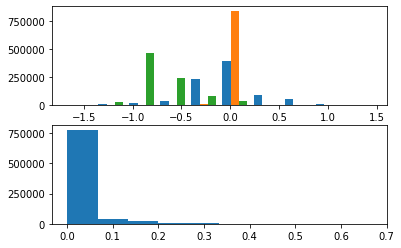

In [32]:
# Lets plot the distribution of our two variables of interest 
fig, axs = plt.subplots(2)
#fig.suptitle('')
axs[0].hist(mesh0['U'])
axs[1].hist(mesh0['nut'])

# Good. Now, lets get the edges connections?

In [33]:
mesh0['cellID']

pyvista_ndarray([     0,      1,      2, ..., 784844, 784844, 784844])

In [34]:
mesh0.extract_cells(0).points

pyvista_ndarray([[298., -30., -50.],
                 [299., -30., -50.],
                 [298., -28., -50.],
                 [299., -28., -50.],
                 [298., -30., -48.],
                 [299., -30., -48.],
                 [298., -28., -48.],
                 [299., -28., -48.]])

In [35]:
mesh0.extract_cells(0)['Node Numbering']

pyvista_ndarray(['0', '1', '85', '86', '2635', '2636', '2720', '2721'],
                dtype='<U4')

In [36]:
feature_select = 'U'
mesh0.set_active_scalars(feature_select)

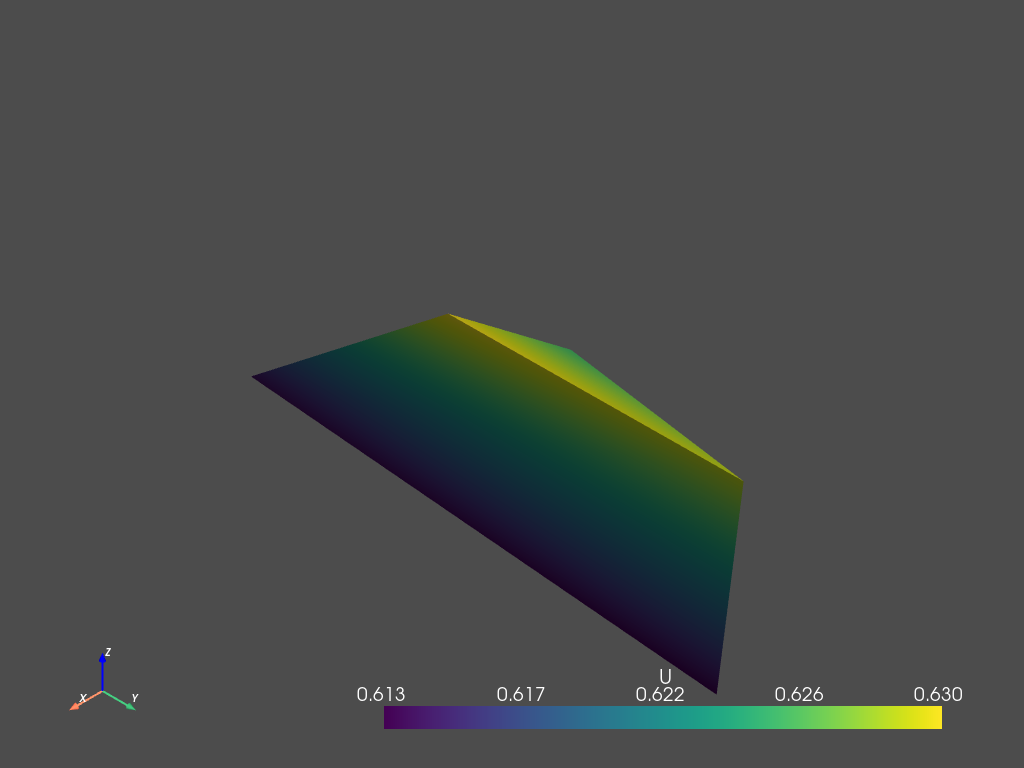

In [37]:
mesh0.extract_cells(46145).plot()

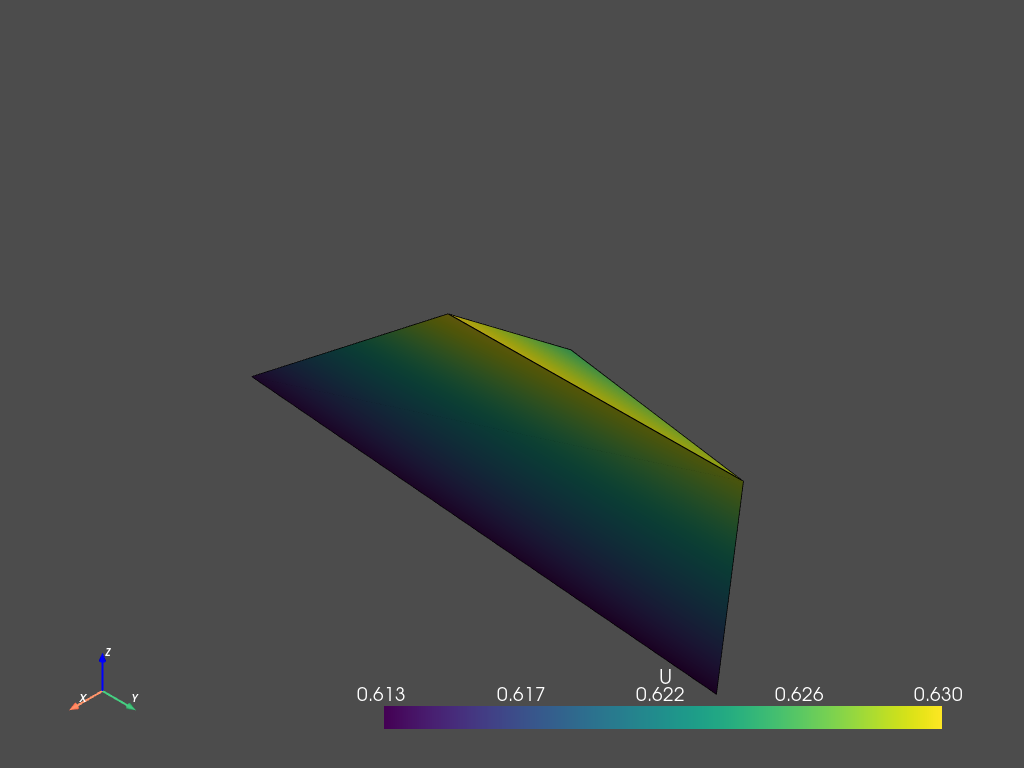

In [38]:
mesh0.extract_cells(46145).plot(show_edges=True)

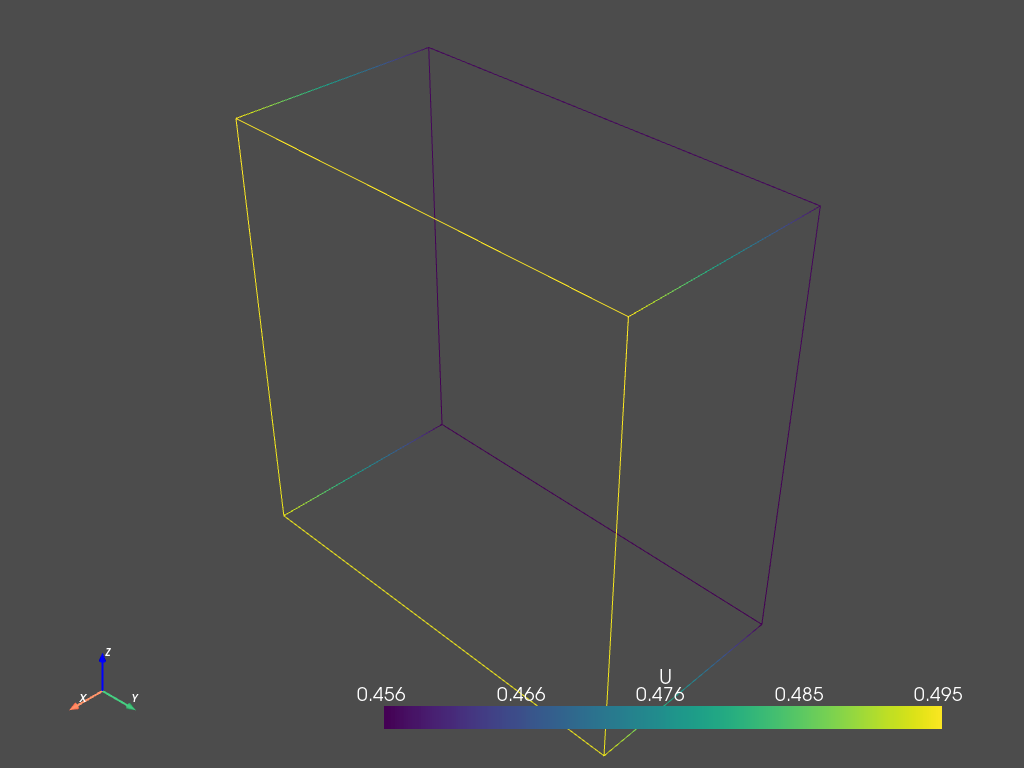

In [39]:
mesh0.extract_cells(1).extract_all_edges().plot()

In [40]:
#lala = [ mesh0.extract_cells(i).n_points for i in range(100) ]

In [41]:
please = [ True if i%9==0 else False for i in range( len(mesh0.cells) )]

In [42]:
mesh0.cells[please]

array([     8,      8,      8, ..., 823763, 851100, 824501], dtype=int64)

In [43]:
toto = mesh0.cells[please][:47000]

In [44]:
min(toto)

5

In [45]:
mesh0.cells[please][46145]  

5

In [46]:
toto = mesh0.cells[please][46140:46150]
toto

array([    8,     8,     8,     8,     8,     5, 48311,     5, 48314,
           5], dtype=int64)

In [47]:
mesh0.cells[46145*9]

5

In [48]:
mesh0.extract_cells(46145)

UnstructuredGrid (0x29d58e2a5c0)
  N Cells:	1
  N Points:	5
  X Bounds:	3.276e+02, 3.281e+02
  Y Bounds:	-1.200e+01, -9.999e+00
  Z Bounds:	-1.910e+01, -1.839e+01
  N Arrays:	14

In [49]:
cell_list = mesh0.cells.reshape(mesh0.n_cells,4)

ValueError: cannot reshape array of size 8265204 into shape (1008231,4)

In [ ]:
# len(cell_list)  1568
cell_list

In [ ]:
edges_list = []

for triang in cell_list:
    
    if triang[1] < triang[2]: 
        edges_list.append( [triang[1],triang[2]] ) 
    else: 
        edges_list.append( [triang[2],triang[1]] ) 
        
    if triang[1] < triang[3]: 
        edges_list.append( [triang[1],triang[3]] ) 
    else: 
        edges_list.append( [triang[3],triang[1]] ) 
    
    if triang[2] < triang[3]: 
        edges_list.append( [triang[2],triang[3]] ) 
    else: 
        edges_list.append( [triang[3],triang[2]] ) 

In [ ]:
len(edges_list)

In [ ]:
revisar = 112

In [ ]:
[a for a in edges_list if a[0]==revisar or a[1]==revisar]

In [ ]:
revisar = 106
[a for a in edges_list if a[0]==revisar or a[1]==revisar]

In [ ]:
revisar = 0
[a for a in edges_list if a[0]==revisar or a[1]==revisar]

In [ ]:
import vtktools

aaa = vtktools.vtu('../jialin_wu_data/2d_canyon_0.vtu')

aaa.GetPointPoints(0)

In [ ]:
aaa = vtktools.vtu('../jialin_wu_data/2d_canyon_0.vtu')

In [ ]:
aaa.GetPointPoints(0)